In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from ydata_profiling import ProfileReport
import missingno as msno

In [7]:
raw_df = pd.read_csv(r"C:\Users\zara8\DS\Capstone_project_2\Data_Raw\amz_us_price_prediction_dataset.csv", index_col=["uid"])


In [8]:
raw_df.dtypes

asin                  object
title                 object
stars                float64
reviews                int64
price                float64
category              object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735414 entries, 1 to 2243235
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   stars              float64
 3   reviews            int64  
 4   price              float64
 5   category           object 
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 107.6+ MB


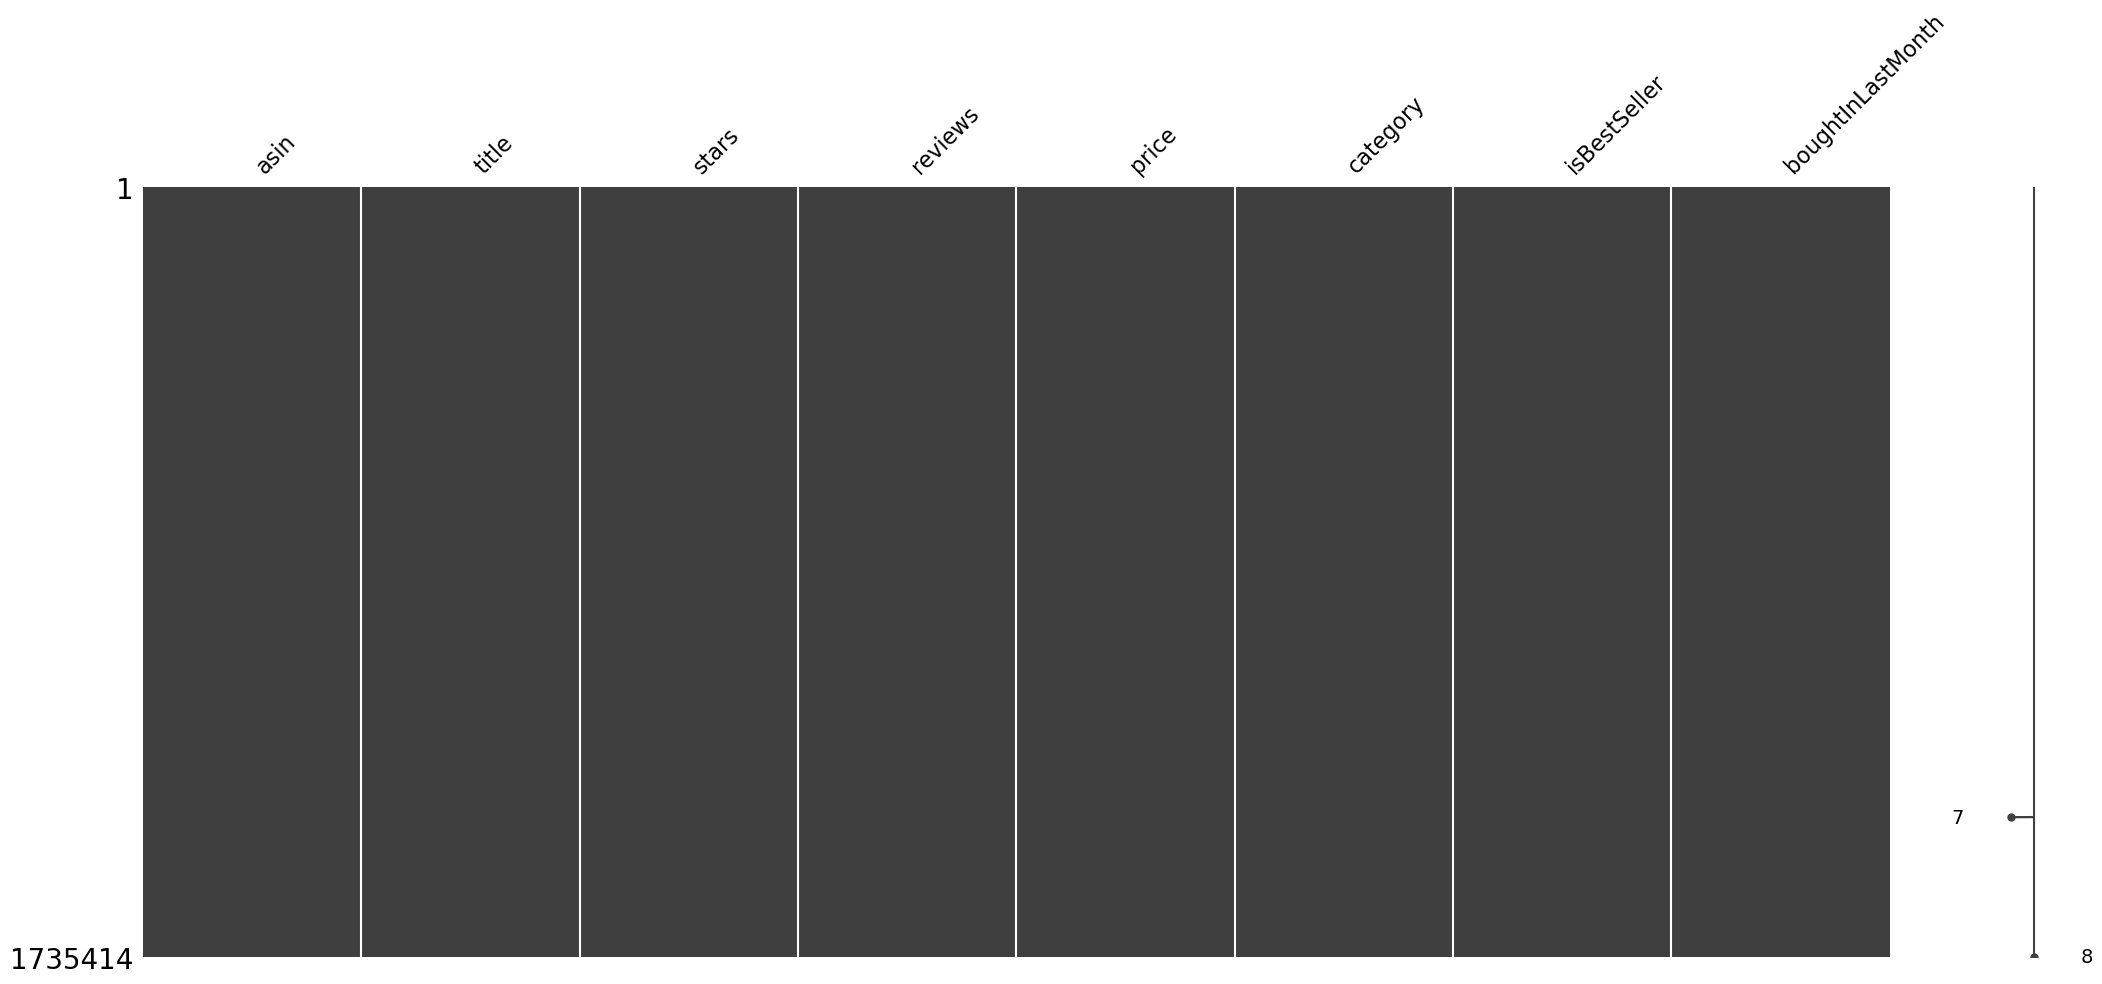

In [29]:
msno.matrix(raw_df)
plt.show()

In [39]:
# Display the count of null values in each column
null_counts = raw_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
asin                 0
title                1
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [41]:
# Display the rows with null values in the 'title' column
print(raw_df[raw_df['title'].isnull()])

               asin title  stars  reviews  price  category  isBestSeller  \
uid                                                                        
1819752  B00758A9CE   NaN    5.0        0  33.08  Car Care         False   

         boughtInLastMonth  
uid                         
1819752                  0  


There is only one row in the dataset where the 'title' column has a null value. All other columns in that row have valid data. This row is uid= '1819752' 

In [20]:

raw_df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'category',
       'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [38]:
raw_df["stars"].unique()

array([4.5, 4.6, 4.4, 4.7, 4.3, 3.9, 4.2, 4.1, 4.8, 4. , 3.7, 2. , 0. ,
       5. , 3.4, 3.3, 3.8, 3.1, 1.5, 2.8, 4.9, 3.6, 3.2, 3.5, 1. , 3. ,
       2.6, 2.3, 2.7, 2.9, 2.5, 2.4, 2.2, 1.9, 2.1, 1.4, 1.7, 1.8, 1.3,
       1.6, 1.2])

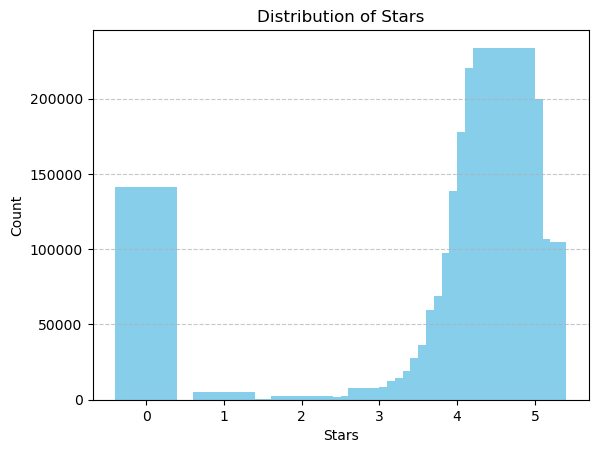

In [36]:
# Check outlier for the 'stars' column
plt.bar(*zip(*raw_df['stars'].value_counts().sort_index().items()), color='skyblue')

plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [31]:
category_counts = raw_df['category'].value_counts().to_dict()

# Create a new DataFrame 'categories' from the dictionary
categories = pd.DataFrame(list(category_counts.items()), columns=['category', 'count'])

# Print or inspect the 'categories' DataFrame
print(categories)


                                           category  count
0                               Games & Accessories  32449
1                                   Girls' Clothing  28688
2                                      Toys & Games  27624
3                            Consoles & Accessories  25295
4                                    Boys' Clothing  24971
..                                              ...    ...
231  Smart Home Thermostats - Compatibility Checker    131
232                    Smart Home: Vacuums and Mops    127
233                   Smart Home: New Smart Devices     95
234                     Smart Home: Lawn and Garden     79
235           Smart Home: Voice Assistants and Hubs     51

[236 rows x 2 columns]


Summary:
